In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
base_path = os.path.join("Data/face_recognition/")
labels = os.listdir(base_path)
print(labels)

['Arif Budi', 'Dikka', 'Hanif', 'Nadia', 'Paska', 'Steffani']


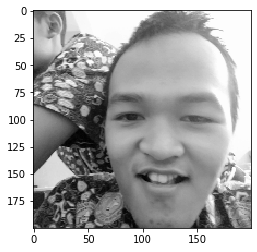

In [3]:
for i in os.listdir(base_path):
    myPictList = os.path.join(base_path, i)
    for j in os.listdir(myPictList):
        img_to_array = cv2.imread(os.path.join(myPictList, j), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_to_array, (200,200))
        plt.imshow(new_array, cmap="gray")
    break

In [5]:
X = []
y = []
labels_id = {}

def create_training_data():
    current_id = 0

    for i in os.listdir(base_path):
        myPictList = os.path.join(base_path, i)
        
        if i in labels_id:
            pass
        else:
            labels_id[i] = current_id
            current_id += 1
              
        for img in os.listdir(myPictList):
            try:
                img_to_array = cv2.imread(os.path.join(myPictList, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_to_array, (224,224))
                X.append(new_array)
                y.append(labels_id[i])
            except Exception as e:
                pass
            
    print(labels_id)
            
create_training_data()

print(labels_id)
print(len(X))
print(X[0])
print(X[0].shape)
print(y)

{'Arif Budi': 0, 'Dikka': 1, 'Hanif': 2, 'Nadia': 3, 'Paska': 4, 'Steffani': 5}
{'Arif Budi': 0, 'Dikka': 1, 'Hanif': 2, 'Nadia': 3, 'Paska': 4, 'Steffani': 5}
174
[[ 57  58  61 ... 185 189 189]
 [ 63  63  63 ... 180 187 185]
 [ 66  61  45 ... 185 185 181]
 ...
 [194 194 194 ...  23  26  29]
 [191 194 193 ...  24  24  29]
 [192 191 193 ...  21  24  29]]
(224, 224)
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [7]:
X_train = np.array(X_train).reshape(-1,224,224,1)
X_train = X_train/255.0

In [8]:
print(X_train[0].shape)

(224, 224, 1)


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(224,224,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax")
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                2986016   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [12]:
from tensorflow.keras.callbacks import TensorBoard

NAME = "Face_recognition"
tboard_log_dir = os.path.join("tensorboard",NAME)
tensorboard = TensorBoard(log_dir = tboard_log_dir)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("acc") > 0.99):
            print(" Reached 99% Accuracy")
            self.model.stop_training = True
            
callbacks = myCallback()

In [13]:
model.fit(X_train, y_train, batch_size=128, validation_split=0.2 , epochs=30, callbacks=[callbacks])

Train on 111 samples, validate on 28 samples
Epoch 1/30
111/111 [==============================] - 13s 118ms/sample - loss: 1.8202 - acc: 0.0450 - val_loss: 1.9616 - val_acc: 0.2143
Epoch 2/30
111/111 [==============================] - 7s 63ms/sample - loss: 1.7198 - acc: 0.2973 - val_loss: 1.6366 - val_acc: 0.3214
Epoch 3/30
111/111 [==============================] - 7s 63ms/sample - loss: 1.5673 - acc: 0.2613 - val_loss: 1.6426 - val_acc: 0.1429
Epoch 4/30
111/111 [==============================] - 6s 55ms/sample - loss: 1.5727 - acc: 0.2072 - val_loss: 1.5331 - val_acc: 0.5357
Epoch 5/30
111/111 [==============================] - 6s 57ms/sample - loss: 1.4534 - acc: 0.5586 - val_loss: 1.4882 - val_acc: 0.3929
Epoch 6/30
111/111 [==============================] - 7s 63ms/sample - loss: 1.3549 - acc: 0.5586 - val_loss: 1.4559 - val_acc: 0.5714
Epoch 7/30
111/111 [==============================] - 6s 58ms/sample - loss: 1.2536 - acc: 0.7477 - val_loss: 1.4513 - val_acc: 0.5357
Epoch 8/

In [14]:
# model.save("Face_recognition_trained.h5")

In [15]:
import tensorflow as tf

new_model = tf.keras.models.load_model("Face_recognition_trained.h5")
new_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
__________________

In [16]:
# model.save("Face_recognition_trained.yml")

In [20]:
import pickle

with open("Data/Pickle/face-labels_dict.pickle", 'wb') as f:
    pickle.dump(labels_id, f)